In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [8]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/Mall_Customers.csv"

dataset=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
X = dataset.iloc[:, [3, 4]].values
# 3 → Annual Income
# 4 → Spending Score


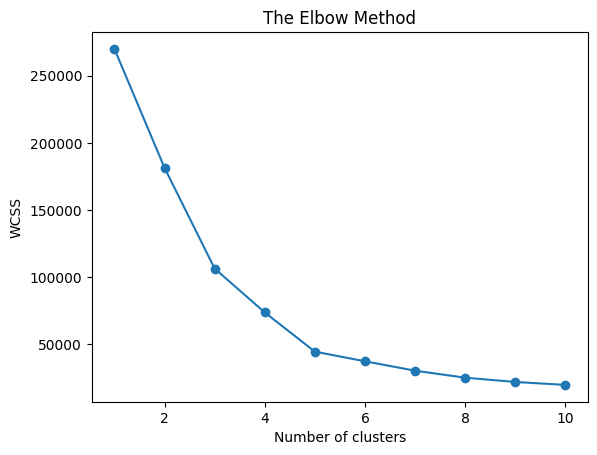

In [18]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=0,
        n_init=10
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [19]:
kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    random_state=0,
    n_init=10
)

y_kmeans = kmeans.fit_predict(X)


In [14]:
y_kmeans

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

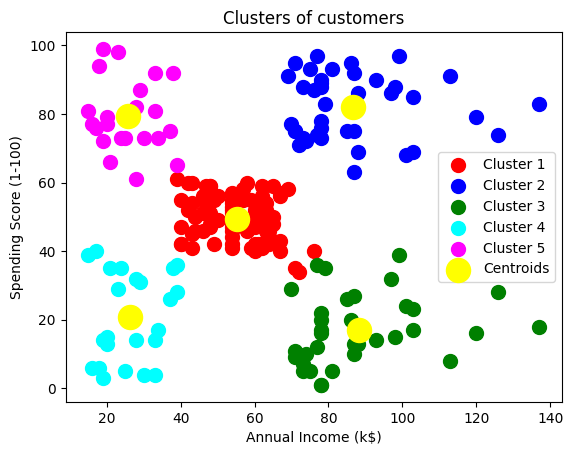

In [20]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s=100, c='red', label='Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s=100, c='blue', label='Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s=100, c='green', label='Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
            s=100, c='cyan', label='Cluster 4')

plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],
            s=100, c='magenta', label='Cluster 5')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
